In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
ytrain = train["label"].values
ytest = train["label"].values

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
Xtrain = train.drop("label",axis=1).values
Xtest = test.values

In [6]:
Xtrain.shape[0]

42000

In [7]:
Xtrainpic = Xtrain.reshape(Xtrain.shape[0],int(sqrt(Xtrain.shape[1])),int(sqrt(Xtrain.shape[1])))

In [8]:
negativeMask=np.ones(784).reshape(28,28)*255

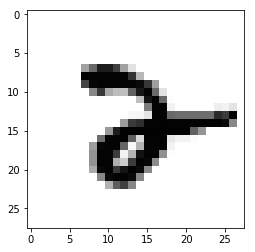

In [9]:
plt.imshow(negativeMask-Xtrainpic[34], cmap='gray')

In [10]:
ytrain[34]

2

In [11]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [12]:
y_train_cat = to_categorical(ytrain)
y_test_cat = to_categorical(ytest)

In [13]:
y_train_cat[34]

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [14]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [78]:
h = model.fit(Xtrain, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 4s - loss: 14.5014 - acc: 0.1001 - val_loss: 14.5811 - val_acc: 0.0954
Epoch 2/10
33600/33600 [==============================] - 4s - loss: 14.4986 - acc: 0.1005 - val_loss: 14.5811 - val_acc: 0.0954
Epoch 3/10
33600/33600 [==============================] - 4s - loss: 14.4986 - acc: 0.1005 - val_loss: 14.5811 - val_acc: 0.0954
Epoch 4/10
33600/33600 [==============================] - 4s - loss: 14.4986 - acc: 0.1005 - val_loss: 14.5811 - val_acc: 0.0954
Epoch 5/10
33600/33600 [==============================] - 4s - loss: 14.4986 - acc: 0.1005 - val_loss: 14.5811 - val_acc: 0.0954
Epoch 6/10
33600/33600 [==============================] - 4s - loss: 14.4986 - acc: 0.1005 - val_loss: 14.5811 - val_acc: 0.0954
Epoch 7/10
33600/33600 [==============================] - 4s - loss: 14.4986 - acc: 0.1005 - val_loss: 14.5811 - val_acc: 0.0954
Epoch 8/10
33600/33600 [========================

In [15]:
from keras.layers import Flatten, Activation,MaxPool2D, AvgPool2D,Conv2D,Conv1D

In [16]:
Xtrain = Xtrain.reshape(-1, 28, 28, 1)
Xtest = Xtest.reshape(-1, 28, 28, 1)

In [160]:
K.clear_session()

model = Sequential()

model.add(Conv2D(64, (8, 8), input_shape=(28, 28, 1)))
model.add(AvgPool2D(pool_size=(4, 4)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())
#model.add(Conv1D(32, 5))

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 21, 21, 64)        4160      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
__________

In [161]:
model.fit(Xtrain, y_train_cat, batch_size=32,
          epochs=20, verbose=1, validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 21s - loss: 1.1306 - acc: 0.6816 - val_loss: 0.5798 - val_acc: 0.8168
Epoch 2/20
33600/33600 [==============================] - 22s - loss: 0.5396 - acc: 0.8378 - val_loss: 0.4199 - val_acc: 0.8825
Epoch 3/20
33600/33600 [==============================] - 21s - loss: 0.4536 - acc: 0.8663 - val_loss: 0.4422 - val_acc: 0.8800
Epoch 4/20
33600/33600 [==============================] - 22s - loss: 0.3952 - acc: 0.8825 - val_loss: 0.3624 - val_acc: 0.8919
Epoch 5/20
33600/33600 [==============================] - 21s - loss: 0.3523 - acc: 0.8972 - val_loss: 0.3130 - val_acc: 0.9083
Epoch 6/20
33600/33600 [==============================] - 21s - loss: 0.3231 - acc: 0.9062 - val_loss: 0.2845 - val_acc: 0.9077
Epoch 7/20
33600/33600 [==============================] - 23s - loss: 0.3057 - acc: 0.9107 - val_loss: 0.3004 - val_acc: 0.9098
Epoch 8/20
33600/33600 [==============================]

In [238]:
ytest = model.predict(Xtest)

In [239]:
pred=list(map(lambda x: list(x).index(max(x)),ytest))

In [96]:
len(pred)

28000

In [97]:
idx = range(1,28001)

In [98]:
len(idx)

28000

In [240]:
subm = pd.DataFrame(data={'ImageId':idx,'Label':pred})

In [241]:
subm.to_csv("subm.csv")

What gets misclassified

In [171]:
ypred = model.predict(Xtrain)
predTrain=list(map(lambda x: list(x).index(max(x)),ypred))

In [172]:
cDF = pd.DataFrame({'original':ytrain,'predicted':predTrain})

In [178]:
cDF2=cDF[cDF['original']!=cDF['predicted']]

In [179]:
pd.crosstab(cDF2['original'],cDF2['predicted'],margins = True)

predicted,0,1,2,3,4,5,6,7,8,9,All
original,,,,,,,,,,,
0,0,2,2,0,5,7,37,1,26,10,90
1,1,0,19,19,9,30,6,9,7,11,111
2,10,12,0,88,33,14,20,81,76,9,343
3,2,4,53,0,4,149,0,42,51,72,377
4,6,8,3,0,0,3,61,3,7,107,198
5,12,1,4,28,11,0,26,3,30,52,167
6,12,1,1,0,40,22,0,0,12,0,88
7,3,3,35,20,18,1,0,0,10,158,248
8,10,33,10,16,17,29,27,7,0,84,233


In [181]:
pd.crosstab(cDF['original'],cDF['predicted'],margins = True)

predicted,0,1,2,3,4,5,6,7,8,9,All
original,,,,,,,,,,,
0,4042,2,2,0,5,7,37,1,26,10,4132
1,1,4573,19,19,9,30,6,9,7,11,4684
2,10,12,3834,88,33,14,20,81,76,9,4177
3,2,4,53,3974,4,149,0,42,51,72,4351
4,6,8,3,0,3874,3,61,3,7,107,4072
5,12,1,4,28,11,3628,26,3,30,52,3795
6,12,1,1,0,40,22,4049,0,12,0,4137
7,3,3,35,20,18,1,0,4153,10,158,4401
8,10,33,10,16,17,29,27,7,3830,84,4063


In [186]:
round(100*(42000-(2071-503))/42000,2)

96.27

Model does quite ok. Number 9 gets misclassified most often. Bringing mistake here down could increase accuracy to 96%

In [188]:
cDF

,original,predicted
0,1,1
1,0,0
2,1,1
3,4,4
4,0,0
5,0,0
6,7,7
7,3,3
8,5,5
9,3,3


In [193]:
Xtrain=Xtrain.reshape(-1,28,28)

Checking some 9 that should be 7

In [210]:
Xmis97=Xtrain[cDF2.loc[(cDF2['original']==7) & (cDF2['predicted']==9),:].index]

In [211]:
Xmis97.shape

(158, 28, 28)

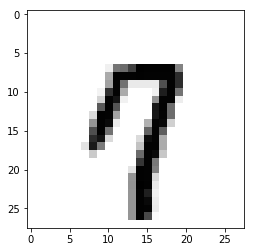

In [212]:
plt.imshow(negativeMask-Xmis97[34], cmap='gray')

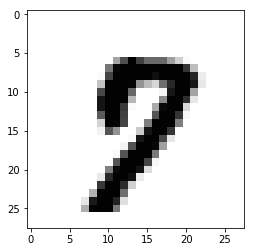

In [213]:
plt.imshow(negativeMask-Xmis97[4], cmap='gray')

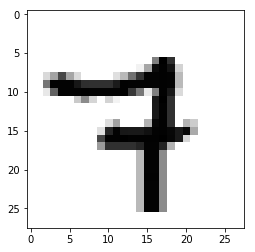

In [215]:
plt.imshow(negativeMask-Xmis97[64], cmap='gray')

In [221]:
K.clear_session()

model = Sequential()

model.add(Conv2D(64, (12, 12), input_shape=(28, 28, 1)))
#model.add(Conv2D(64, (8, 8), input_shape=(28, 28, 1)))
model.add(AvgPool2D(pool_size=(4, 4)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())
#model.add(Conv1D(32, 5))

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 17, 17, 64)        9280      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 32)          18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
__________

In [223]:
Xtrain = Xtrain.reshape(-1, 28, 28, 1)
model.fit(Xtrain, y_train_cat, batch_size=32,
          epochs=20, verbose=1, validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 23s - loss: 2.0551 - acc: 0.7762 - val_loss: 0.4206 - val_acc: 0.8945
Epoch 2/20
33600/33600 [==============================] - 23s - loss: 0.4453 - acc: 0.8868 - val_loss: 0.3941 - val_acc: 0.9085
Epoch 3/20
33600/33600 [==============================] - 23s - loss: 0.4232 - acc: 0.8947 - val_loss: 0.4600 - val_acc: 0.9012
Epoch 4/20
33600/33600 [==============================] - 23s - loss: 0.3727 - acc: 0.9056 - val_loss: 0.3573 - val_acc: 0.9135
Epoch 5/20
33600/33600 [==============================] - 23s - loss: 0.3437 - acc: 0.9122 - val_loss: 0.3358 - val_acc: 0.9150
Epoch 6/20
33600/33600 [==============================] - 24s - loss: 0.3093 - acc: 0.9190 - val_loss: 0.2611 - val_acc: 0.9265
Epoch 7/20
33600/33600 [==============================] - 24s - loss: 0.2754 - acc: 0.9233 - val_loss: 0.2701 - val_acc: 0.9280
Epoch 8/20
33600/33600 [==============================]

In [224]:
ypred = model.predict(Xtrain)
predTrain=list(map(lambda x: list(x).index(max(x)),ypred))
cDF = pd.DataFrame({'original':ytrain,'predicted':predTrain})
cDF2=cDF[cDF['original']!=cDF['predicted']]
pd.crosstab(cDF2['original'],cDF2['predicted'],margins = True)

predicted,0,1,2,3,4,5,6,7,8,9,All
original,,,,,,,,,,,
0,0,0,1,1,4,2,28,0,30,5,71
1,0,0,24,8,5,6,2,16,17,2,80
2,6,2,0,59,10,3,20,156,49,2,307
3,1,0,32,0,0,21,0,34,52,22,162
4,4,5,5,1,0,2,46,13,14,103,193
5,11,2,12,217,4,0,55,5,62,12,380
6,19,7,0,2,9,6,0,0,11,0,54
7,4,2,12,11,8,0,1,0,5,33,76
8,15,28,10,16,8,3,23,10,0,30,143


Increasing window size in first convolutional layer seems to help with diminishing misclassification of 7 vs 9 but at the same time increased misclassification of 5 vs 3. But generally it is progressing - not only because increase of accuracy, but because misclassifications are more concentrated which can be specifically addressed

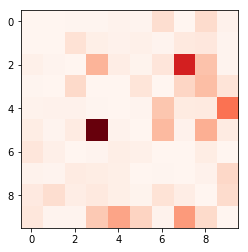

In [237]:
plt.imshow(pd.crosstab(cDF2['original'],cDF2['predicted']),cmap='Reds')

In [232]:
Xmis35=Xtrainpic[cDF2.loc[(cDF2['original']==5) & (cDF2['predicted']==3),:].index]

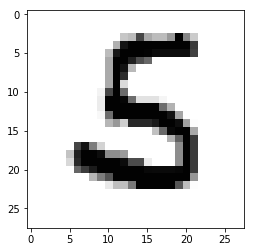

In [234]:
plt.imshow(negativeMask-Xmis35[24], cmap='gray')

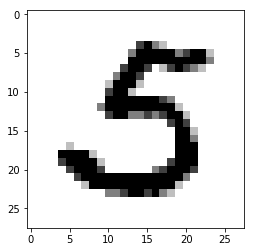

In [233]:
plt.imshow(negativeMask-Xmis35[2], cmap='gray')

Different tries. (Functional API)

In [118]:
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate

In [156]:
K.clear_session()

main_input = Input((28, 28, 1), name='image')
#main_inputpooled = AvgPool2D(2,2)(main_input)

#x1=Conv2D(64, (14, 14),name="conv14")(main_input)
x2=Conv2D(64, (7, 7),name="conv7")(main_input)
x3=Conv2D(64, (4, 4),name="conv4")(main_input)

#x1p=MaxPool2D(pool_size=(14, 14))(x1)
#x2p=MaxPool2D(pool_size=(2, 1))(x2)
#x3p=MaxPool2D(pool_size=(1, 2))(x3)

x2b=Conv2D(32, (4, 4))(x2)
x3b=Conv2D(32, (2, 2))(x3)

#x1pf=Flatten()(x1)
x2pf=Flatten()(x2)
x3pf=Flatten()(x3)
#x = concatenate([x1pf,x2pf,x3pf])
x = concatenate([x2pf,x3pf])
x=Dense(16, activation='relu')(x)
main_output=Dense(10, activation='softmax')(x)
model = Model(inputs=main_input, outputs=main_output)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
image (InputLayer)               (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
conv7 (Conv2D)                   (None, 22, 22, 64)    3200        image[0][0]                      
____________________________________________________________________________________________________
conv4 (Conv2D)                   (None, 25, 25, 64)    1088        image[0][0]                      
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 30976)         0           conv7[0][0]                      
___________________________________________________________________________________________

In [159]:
model.fit(Xtrain, y_train_cat, batch_size=64,
          epochs=10, verbose=1, validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 62s - loss: 5.7841 - acc: 0.6410 - val_loss: 5.9009 - val_acc: 0.6338
Epoch 2/10
33600/33600 [==============================] - 62s - loss: 5.8154 - acc: 0.6391 - val_loss: 5.6470 - val_acc: 0.6496
Epoch 3/10
33600/33600 [==============================] - 62s - loss: 5.6364 - acc: 0.6502 - val_loss: 5.4615 - val_acc: 0.6608
Epoch 4/10
33600/33600 [==============================] - 62s - loss: 5.2693 - acc: 0.6729 - val_loss: 5.0629 - val_acc: 0.6858
Epoch 5/10
33600/33600 [==============================] - 63s - loss: 4.8250 - acc: 0.7005 - val_loss: 4.7231 - val_acc: 0.7069
Epoch 6/10
33600/33600 [==============================] - 63s - loss: 4.7802 - acc: 0.7033 - val_loss: 5.1129 - val_acc: 0.6826
Epoch 7/10
33600/33600 [==============================] - 63s - loss: 5.0235 - acc: 0.6882 - val_loss: 5.0958 - val_acc: 0.6838
Epoch 8/10
33600/33600 [==============================]

In [111]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]